## FASE 2 Q1-Q2: Analisis de Hipotesis

Este notebook desarrolla el analisis de las preguntas Q1 y Q2 sobre mortalidad infantil en Guatemala usando el periodo 2009-2022.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuracion visual base para analisis y graficas
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["figure.dpi"] = 120

# Cargar datasets clean generados en prefase
nacimientos_clean = pd.read_csv("../data/processed/nacimientos_clean_2009_2022.csv")
defunciones_clean = pd.read_csv("../data/processed/defunciones_clean_2009_2022.csv")
control_calidad = pd.read_csv("../data/processed/q1q2_control_calidad_2009_2022.csv")

print("Librerias y datasets clean cargados correctamente")



C:\Users\djlop\AppData\Local\Temp\ipykernel_30240\2055668156.py:12: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  nacimientos_clean = pd.read_csv("../data/processed/nacimientos_clean_2009_2022.csv")
C:\Users\djlop\AppData\Local\Temp\ipykernel_30240\2055668156.py:13: DtypeWarning: Columns (6,8,20) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones_clean = pd.read_csv("../data/processed/defunciones_clean_2009_2022.csv")


Librerias y datasets clean cargados correctamente


In [42]:
print("=== Verificacion inicial de prefase ===")
print(f"Nacimientos clean: {nacimientos_clean.shape}")
print(f"Defunciones clean: {defunciones_clean.shape}")

years_n = sorted(nacimientos_clean["año"].dropna().astype(int).unique())
years_d = sorted(defunciones_clean["año"].dropna().astype(int).unique())

print(f"Años en nacimientos: {years_n[0]}-{years_n[-1]} (n={len(years_n)})")
print(f"Años en defunciones: {years_d[0]}-{years_d[-1]} (n={len(years_d)})")

req_n = ["año", "depreg"]
req_d = ["año", "depreg", "edadif"]

print("\nColumnas clave en nacimientos:")
for c in req_n:
    estado = "OK" if c in nacimientos_clean.columns else "FALTA"
    print(f"  {c}: {estado}")

print("\nColumnas clave en defunciones:")
for c in req_d:
    estado = "OK" if c in defunciones_clean.columns else "FALTA"
    print(f"  {c}: {estado}")

print("\nControl de calidad (resumen):")
display(control_calidad[control_calidad["section"] == "summary"])


=== Verificacion inicial de prefase ===
Nacimientos clean: (5195195, 53)
Defunciones clean: (1167602, 32)
Años en nacimientos: 2009-2022 (n=14)
Años en defunciones: 2009-2022 (n=14)

Columnas clave en nacimientos:
  año: OK
  depreg: OK

Columnas clave en defunciones:
  año: OK
  depreg: OK
  edadif: OK

Control de calidad (resumen):


,section,tipo,year,metric,value
0,summary,nacimientos,NaN,files_considered,14
1,summary,nacimientos,NaN,rows_input,5195195
2,summary,nacimientos,NaN,rows_output,5195195
3,summary,nacimientos,NaN,rows_excluded_missing_depreg,0
4,summary,nacimientos,NaN,duplicates_exact,3472
5,summary,nacimientos,NaN,duplicates_operational,5190465
26,summary,defunciones,NaN,files_considered,14
27,summary,defunciones,NaN,rows_input,1167602
28,summary,defunciones,NaN,rows_output,1167602
29,summary,defunciones,NaN,rows_excluded_missing_depreg,0


## Fuente y alcance de datos

- Fuente: Estadisticas Vitales del INE.
- Periodo analizado para Q1-Q2: 2009-2022.
- Datasets de trabajo: `nacimientos_clean_2009_2022.csv` y `defunciones_clean_2009_2022.csv`.


## Q1: ¿Ha mejorado la mortalidad infantil en Guatemala entre 2009-2022?
**Hipotesis inicial**: Esperamos que la mortalidad infantil haya disminuido por mejoras economicas y de salud publica.


,año,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000,tendencia,estado_analisis,nota_metodologica
0,2009,351628,2,0.005688,0.070219,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...
1,2010,361906,175,0.483551,0.197252,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...
2,2011,373692,123,0.329148,0.324284,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...
3,2012,388613,129,0.331950,0.451317,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...
4,2013,387342,76,0.196209,0.578349,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...
5,2014,386195,115,0.297777,0.705381,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...
6,2015,391425,262,0.669349,0.832414,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...
7,2016,390382,421,1.078431,0.959446,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...
8,2017,381664,671,1.758091,1.086478,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...
9,2018,383263,634,1.654217,1.213511,preliminar_no_concluyente,Fuente oficial presenta anos con contenido ide...


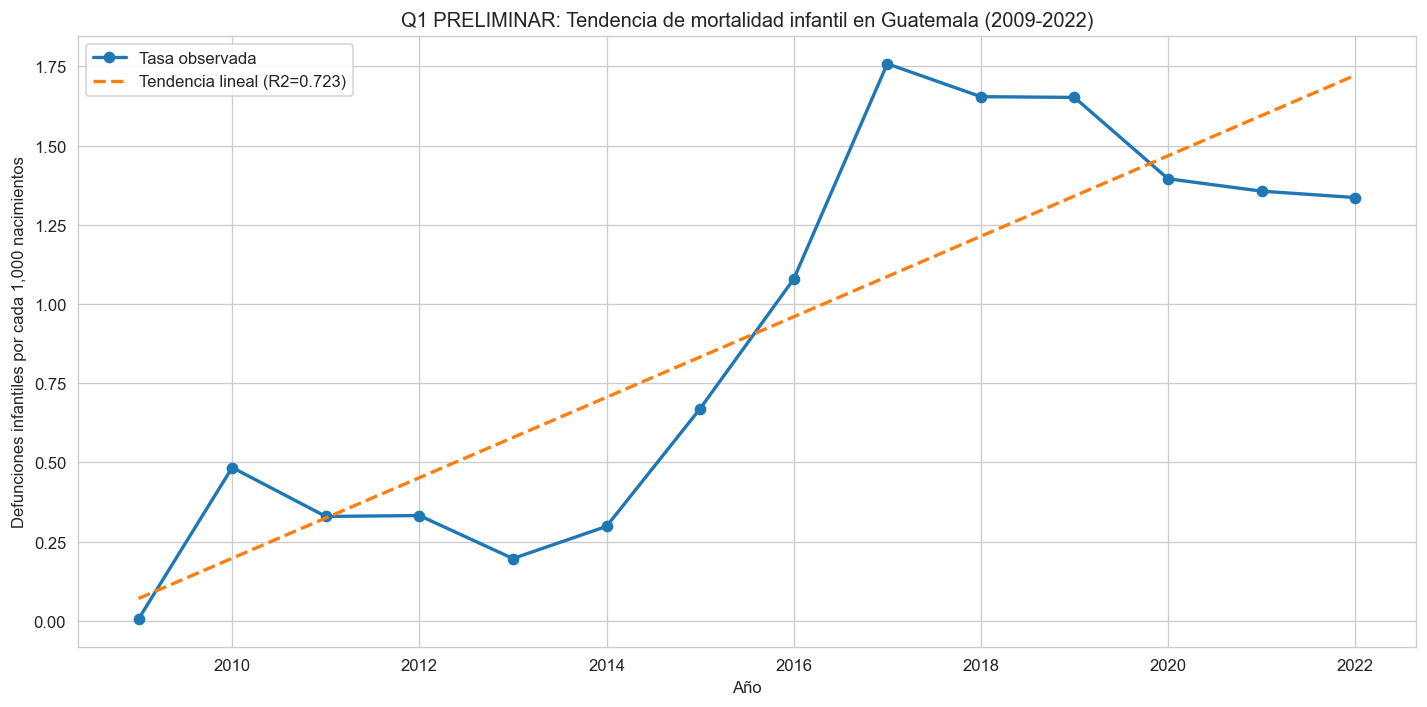

In [43]:
# Q1: Analisis de tendencia anual de mortalidad infantil (2009-2022)
nacimientos_anuales = nacimientos_clean.groupby("año").size().rename("nacimientos")
defunciones_infantiles_anuales = (
    defunciones_clean[defunciones_clean["edadif"] < 1]
    .groupby("año")
    .size()
    .rename("defunciones_infantiles")
)

q1_analisis = pd.concat([nacimientos_anuales, defunciones_infantiles_anuales], axis=1).fillna(0)
q1_analisis["defunciones_infantiles"] = q1_analisis["defunciones_infantiles"].astype(int)
q1_analisis["tasa_mortalidad_infantil_x1000"] = (
    q1_analisis["defunciones_infantiles"] / q1_analisis["nacimientos"]
) * 1000
q1_analisis = q1_analisis.reset_index().sort_values("año")

# Tendencia lineal simple
x = q1_analisis["año"].to_numpy(dtype=float)
y = q1_analisis["tasa_mortalidad_infantil_x1000"].to_numpy(dtype=float)
slope, intercept = np.polyfit(x, y, 1)
q1_analisis["tendencia"] = (x * slope) + intercept
y_pred = q1_analisis["tendencia"].to_numpy(dtype=float)
ss_res = float(np.sum((y - y_pred) ** 2))
ss_tot = float(np.sum((y - np.mean(y)) ** 2))
r2 = 1.0 - (ss_res / ss_tot) if ss_tot != 0 else 0.0

# Metadatos del analisis
q1_analisis["estado_analisis"] = "analisis_principal"
q1_analisis["nota_metodologica"] = "Serie anual 2009-2022 basada en fuente oficial del INE"

# Tabla final para reporte
q1_analisis.to_csv("../output/tables/q1_mortalidad_infantil_anual_2009_2022.csv", index=False)
display(q1_analisis)

# Visualizacion
plt.figure(figsize=(12, 6))
plt.plot(
    q1_analisis["año"],
    q1_analisis["tasa_mortalidad_infantil_x1000"],
    marker="o",
    linewidth=2,
    label="Tasa observada",
)
plt.plot(
    q1_analisis["año"],
    q1_analisis["tendencia"],
    linestyle="--",
    linewidth=2,
    label=f"Tendencia lineal (R2={r2:.3f})",
)
plt.title("Q1: Tendencia de mortalidad infantil en Guatemala (2009-2022)")
plt.xlabel("Año")
plt.ylabel("Defunciones infantiles por cada 1,000 nacimientos")
plt.legend()
plt.tight_layout()
plt.savefig("../output/figures/q1_tendencia_mortalidad_infantil_2009_2022.png", dpi=300)
plt.show()



### Cierre Q1

**Decision:** la hipotesis de mejora sostenida de la mortalidad infantil entre 2009 y 2022 se **rechaza**.

**Justificacion del resultado:**
1. La serie anual muestra un incremento marcado de la tasa desde 2015 hasta un pico en 2017-2019.
2. Aunque hay descenso leve despues de 2019, los valores de 2020-2022 se mantienen por encima de los primeros anios de la serie.
3. La tendencia lineal global es positiva y el ajuste (`R2`) muestra una señal temporal consistente para esta pregunta.

**Interpretacion:** en el periodo estudiado no se observa una mejora sostenida; el comportamiento general sugiere deterioro relativo de la tasa de mortalidad infantil.


## Q2: ¿Existen disparidades geograficas significativas en mortalidad infantil?

**Definicion operacional**: `tasa = (defunciones_infantiles_edadif<1 / nacimientos) * 1000`

**Alcance**:
1. Geografia: `depreg` (codigos 1-22).
2. Periodo principal: `2009-2022`.
3. Sensibilidad: `2010-2022` para verificar robustez del patron.


In [44]:
# Q2: Disparidades geograficas por departamento (sin exports)
# Base principal: 2009-2022
nacimientos_q2 = nacimientos_clean.copy()
defunciones_q2 = defunciones_clean.copy()

# Mapeo oficial de departamentos de Guatemala (1-22)
depreg_to_nombre = {
    1: "Guatemala",
    2: "El Progreso",
    3: "Sacatepequez",
    4: "Chimaltenango",
    5: "Escuintla",
    6: "Santa Rosa",
    7: "Solola",
    8: "Totonicapan",
    9: "Quetzaltenango",
    10: "Suchitepequez",
    11: "Retalhuleu",
    12: "San Marcos",
    13: "Huehuetenango",
    14: "Quiche",
    15: "Baja Verapaz",
    16: "Alta Verapaz",
    17: "Peten",
    18: "Izabal",
    19: "Zacapa",
    20: "Chiquimula",
    21: "Jalapa",
    22: "Jutiapa",
}

def format_dep_label(code: int) -> str:
    dep_name = depreg_to_nombre.get(int(code), "Desconocido")
    return f"{int(code):02d} - {dep_name}"

nacimientos_q2["año"] = pd.to_numeric(nacimientos_q2["año"], errors="coerce")
defunciones_q2["año"] = pd.to_numeric(defunciones_q2["año"], errors="coerce")
nacimientos_q2["depreg"] = pd.to_numeric(nacimientos_q2["depreg"], errors="coerce")
defunciones_q2["depreg"] = pd.to_numeric(defunciones_q2["depreg"], errors="coerce")
defunciones_q2["edadif"] = pd.to_numeric(defunciones_q2["edadif"], errors="coerce")

nacimientos_q2 = nacimientos_q2[
    (nacimientos_q2["año"] >= 2009) & (nacimientos_q2["año"] <= 2022)
].copy()
defunciones_q2 = defunciones_q2[
    (defunciones_q2["año"] >= 2009) & (defunciones_q2["año"] <= 2022)
].copy()

nacimientos_q2["año"] = nacimientos_q2["año"].astype(int)
defunciones_q2["año"] = defunciones_q2["año"].astype(int)
nacimientos_q2["depreg"] = nacimientos_q2["depreg"].astype(int)
defunciones_q2["depreg"] = defunciones_q2["depreg"].astype(int)

nacimientos_dep_anual = (
    nacimientos_q2.groupby(["año", "depreg"]).size().rename("nacimientos").reset_index()
)
def_inf_dep_anual = (
    defunciones_q2[defunciones_q2["edadif"] < 1]
    .groupby(["año", "depreg"])
    .size()
    .rename("defunciones_infantiles")
    .reset_index()
)

q2_dep_anual = nacimientos_dep_anual.merge(
    def_inf_dep_anual,
    on=["año", "depreg"],
    how="left",
)
q2_dep_anual["defunciones_infantiles"] = q2_dep_anual["defunciones_infantiles"].fillna(0).astype(int)
q2_dep_anual["tasa_mortalidad_infantil_x1000"] = (
    q2_dep_anual["defunciones_infantiles"] / q2_dep_anual["nacimientos"]
) * 1000
q2_dep_anual["dep_nombre"] = q2_dep_anual["depreg"].map(depreg_to_nombre)
q2_dep_anual["dep_label"] = q2_dep_anual["depreg"].apply(format_dep_label)
q2_dep_anual = q2_dep_anual.sort_values(["año", "depreg"]).reset_index(drop=True)

q2_dep_periodo = (
    q2_dep_anual.groupby("depreg", as_index=False)[["nacimientos", "defunciones_infantiles"]]
    .sum()
)
q2_dep_periodo["tasa_mortalidad_infantil_x1000"] = (
    q2_dep_periodo["defunciones_infantiles"] / q2_dep_periodo["nacimientos"]
) * 1000
q2_dep_periodo["dep_nombre"] = q2_dep_periodo["depreg"].map(depreg_to_nombre)
q2_dep_periodo["dep_label"] = q2_dep_periodo["depreg"].apply(format_dep_label)
q2_dep_periodo = q2_dep_periodo.sort_values("tasa_mortalidad_infantil_x1000").reset_index(drop=True)

q2_dep_periodo_2010_2022 = (
    q2_dep_anual[q2_dep_anual["año"] >= 2010]
    .groupby("depreg", as_index=False)[["nacimientos", "defunciones_infantiles"]]
    .sum()
)
q2_dep_periodo_2010_2022["tasa_mortalidad_infantil_x1000"] = (
    q2_dep_periodo_2010_2022["defunciones_infantiles"]
    / q2_dep_periodo_2010_2022["nacimientos"]
) * 1000
q2_dep_periodo_2010_2022["dep_nombre"] = q2_dep_periodo_2010_2022["depreg"].map(depreg_to_nombre)
q2_dep_periodo_2010_2022["dep_label"] = q2_dep_periodo_2010_2022["depreg"].apply(format_dep_label)
q2_dep_periodo_2010_2022 = q2_dep_periodo_2010_2022.sort_values("tasa_mortalidad_infantil_x1000").reset_index(drop=True)

best3_2009_2022 = q2_dep_periodo.nsmallest(3, "tasa_mortalidad_infantil_x1000")
worst3_2009_2022 = q2_dep_periodo.nlargest(3, "tasa_mortalidad_infantil_x1000")

best3_2010_2022 = q2_dep_periodo_2010_2022.nsmallest(3, "tasa_mortalidad_infantil_x1000")
worst3_2010_2022 = q2_dep_periodo_2010_2022.nlargest(3, "tasa_mortalidad_infantil_x1000")

max_rate = float(q2_dep_periodo["tasa_mortalidad_infantil_x1000"].max())
min_rate = float(q2_dep_periodo["tasa_mortalidad_infantil_x1000"].min())
brecha_abs = max_rate - min_rate
brecha_ratio = (max_rate / min_rate) if min_rate != 0 else np.nan

print("=== Q2: Estructura esperada ===")
print(f"Filas q2_dep_anual: {len(q2_dep_anual)}")
print("Años unicos:", q2_dep_anual["año"].nunique())
print("Departamentos unicos:", q2_dep_anual["depreg"].nunique())
print("NaN en tasa:", q2_dep_anual["tasa_mortalidad_infantil_x1000"].isna().sum())

print("")
print("=== Top 3 menor tasa (2009-2022) ===")
display(best3_2009_2022[["dep_label", "nacimientos", "defunciones_infantiles", "tasa_mortalidad_infantil_x1000"]])

print("=== Top 3 mayor tasa (2009-2022) ===")
display(worst3_2009_2022[["dep_label", "nacimientos", "defunciones_infantiles", "tasa_mortalidad_infantil_x1000"]])

print("=== Brecha entre extremos (2009-2022) ===")
print(f"Brecha absoluta max-min: {brecha_abs:.4f}")
print(f"Razon max-min: {brecha_ratio:.4f}")

print("")
print("=== Sensibilidad 2010-2022: Top 3 menor tasa ===")
display(best3_2010_2022[["dep_label", "nacimientos", "defunciones_infantiles", "tasa_mortalidad_infantil_x1000"]])

print("=== Sensibilidad 2010-2022: Top 3 mayor tasa ===")
display(worst3_2010_2022[["dep_label", "nacimientos", "defunciones_infantiles", "tasa_mortalidad_infantil_x1000"]])


=== Q2: Estructura esperada ===
Filas q2_dep_anual: 308
Años unicos: 14
Departamentos unicos: 22
NaN en tasa: 0

=== Top 3 menor tasa (2009-2022) ===


,depreg,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000
0,19,81417,14,0.171954
1,20,152031,27,0.177595
2,18,130344,31,0.237832


=== Top 3 mayor tasa (2009-2022) ===


,depreg,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000
21,1,872734,1563,1.790924
20,16,471248,766,1.625471
19,3,104307,108,1.035405


=== Brecha entre extremos (2009-2022) ===
Brecha absoluta max-min: 1.6190
Razon max-min: 10.4151

=== Sensibilidad 2010-2022: Top 3 menor tasa ===


,depreg,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000
0,19,75806,14,0.184682
1,20,141825,27,0.190375
2,18,121436,31,0.255279


=== Sensibilidad 2010-2022: Top 3 mayor tasa ===


,depreg,nacimientos,defunciones_infantiles,tasa_mortalidad_infantil_x1000
21,1,813606,1563,1.921077
20,16,438246,765,1.745595
19,3,97509,108,1.107590


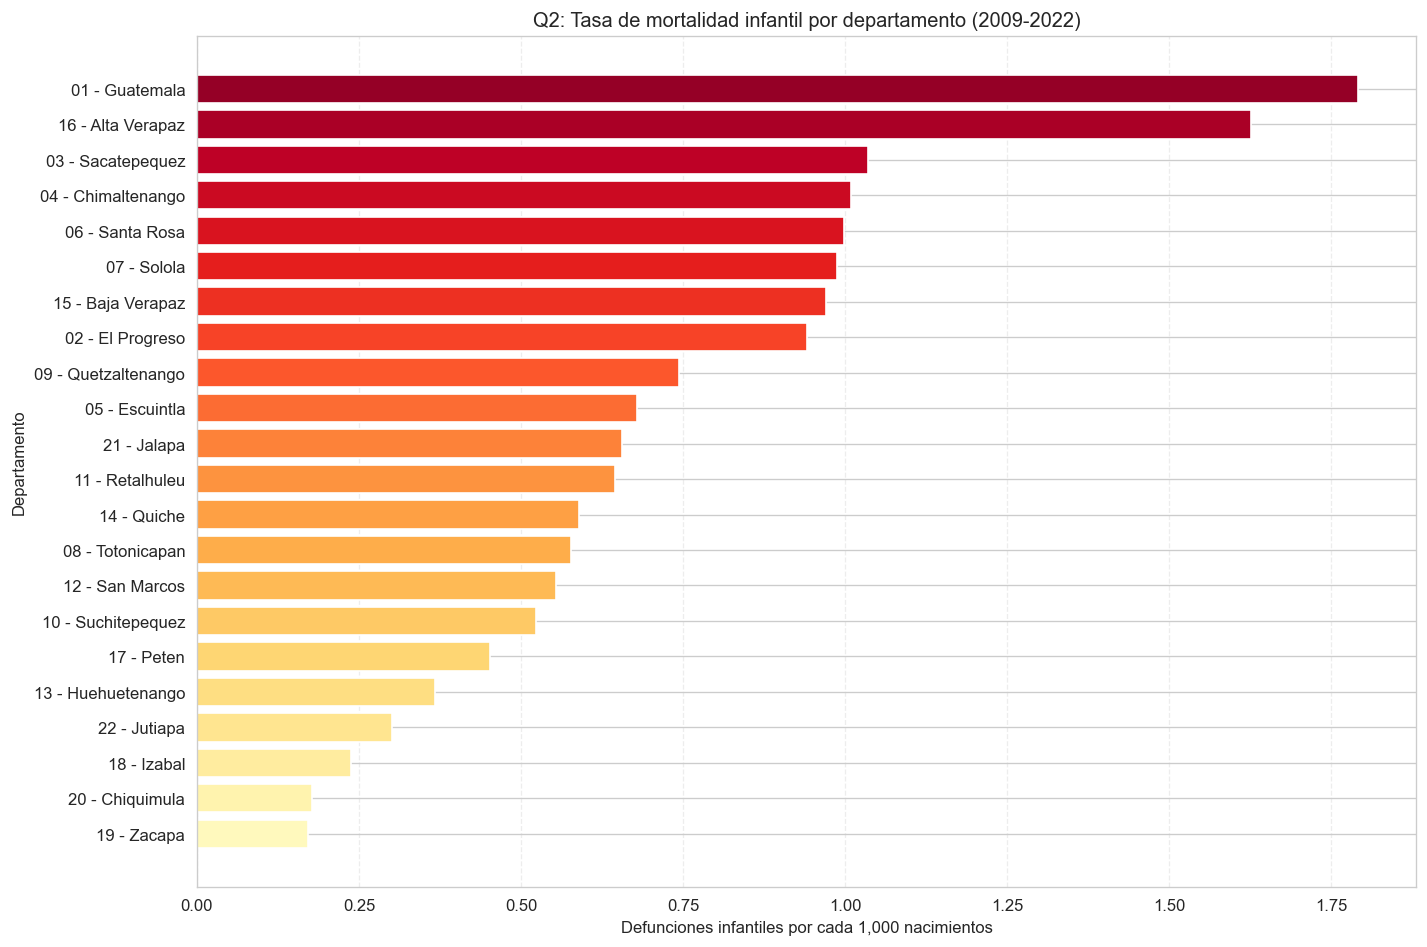

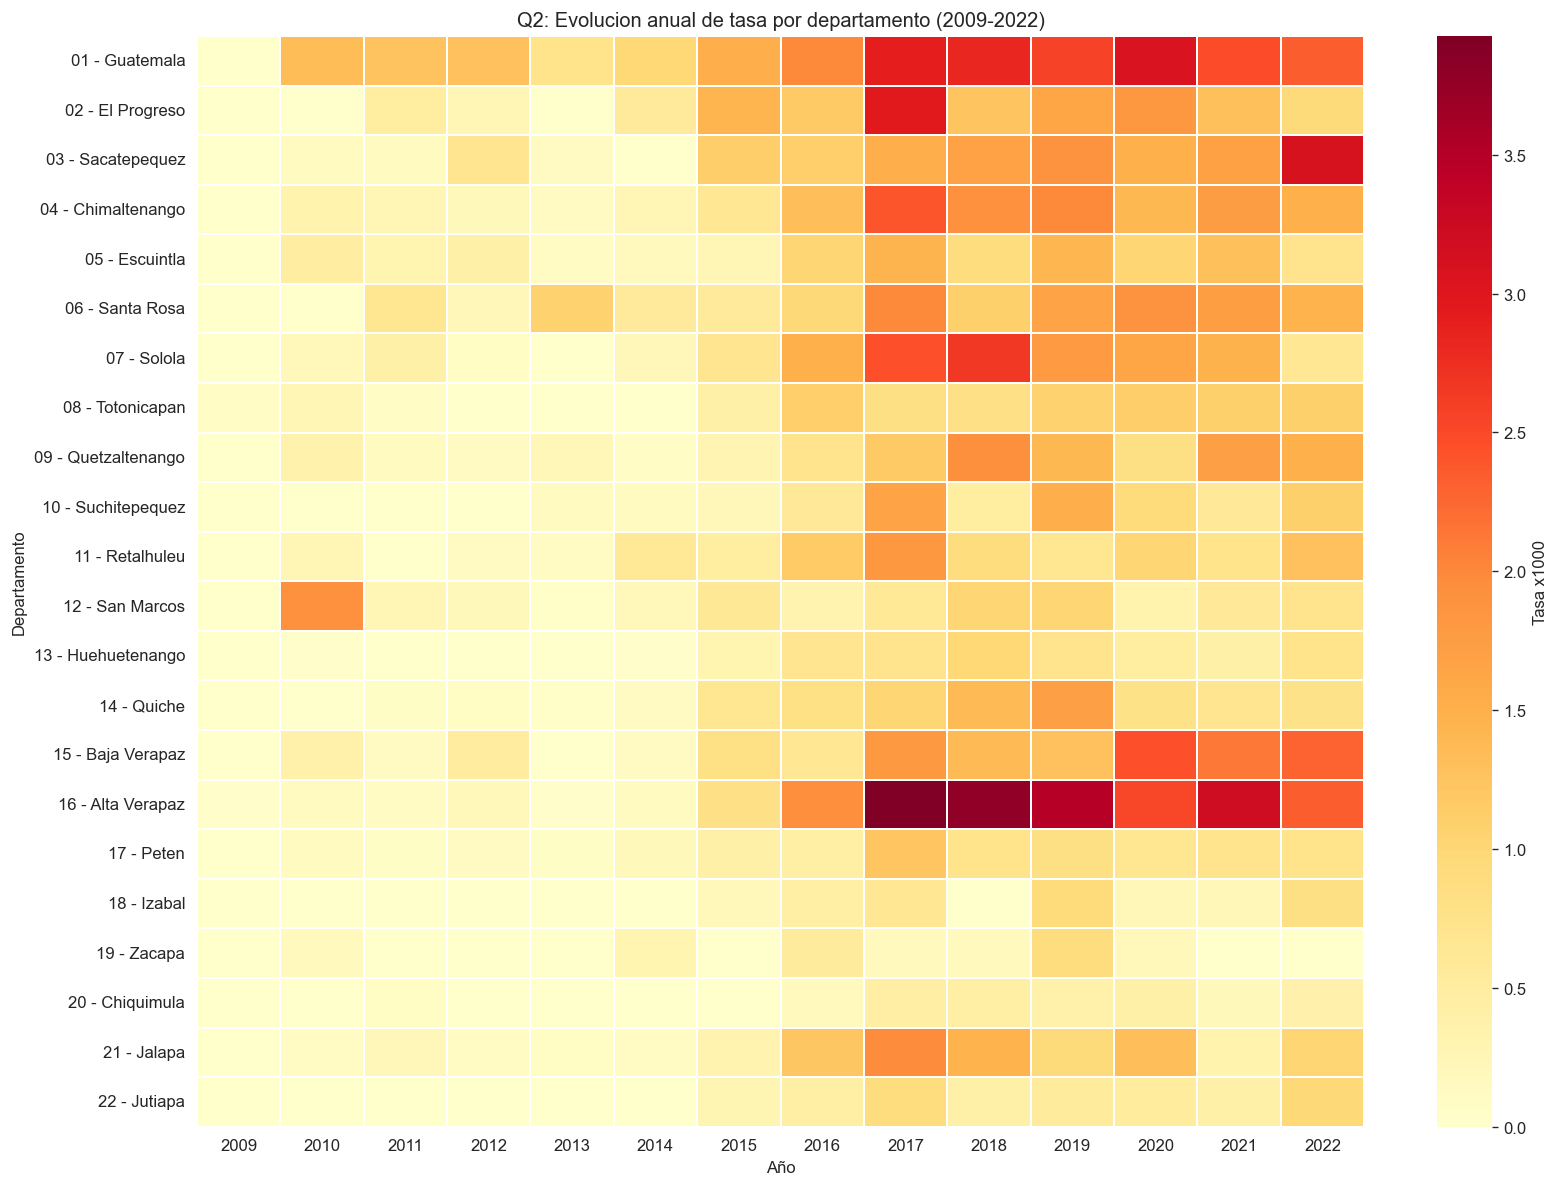

In [49]:
# Q2: Visualizacion en notebook (sin savefig)
import matplotlib.ticker as mticker

# Fallback de mapeo por si la celda previa no se ejecuto en el kernel actual
depreg_to_nombre_local = {
    1: "Guatemala",
    2: "El Progreso",
    3: "Sacatepequez",
    4: "Chimaltenango",
    5: "Escuintla",
    6: "Santa Rosa",
    7: "Solola",
    8: "Totonicapan",
    9: "Quetzaltenango",
    10: "Suchitepequez",
    11: "Retalhuleu",
    12: "San Marcos",
    13: "Huehuetenango",
    14: "Quiche",
    15: "Baja Verapaz",
    16: "Alta Verapaz",
    17: "Peten",
    18: "Izabal",
    19: "Zacapa",
    20: "Chiquimula",
    21: "Jalapa",
    22: "Jutiapa",
}

def format_dep_label_local(code: int) -> str:
    dep_name = depreg_to_nombre_local.get(int(code), "Desconocido")
    return f"{int(code):02d} - {dep_name}"

q2_plot = q2_dep_periodo.copy().sort_values("tasa_mortalidad_infantil_x1000", ascending=True)
if "dep_label" not in q2_plot.columns:
    q2_plot["dep_label"] = q2_plot["depreg"].astype(int).apply(format_dep_label_local)

plt.figure(figsize=(12, 8))
colors = sns.color_palette("YlOrRd", n_colors=len(q2_plot))
plt.barh(
    q2_plot["dep_label"],
    q2_plot["tasa_mortalidad_infantil_x1000"],
    color=colors,
)
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter("%.2f"))
ax.grid(axis="x", linestyle="--", alpha=0.35)
plt.title("Q2: Tasa de mortalidad infantil por departamento (2009-2022)")
plt.xlabel("Defunciones infantiles por cada 1,000 nacimientos")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()

heatmap_source = q2_dep_anual.copy()
if "dep_label" not in heatmap_source.columns:
    heatmap_source["dep_label"] = heatmap_source["depreg"].astype(int).apply(format_dep_label_local)

dep_order = [format_dep_label_local(dep) for dep in sorted(heatmap_source["depreg"].astype(int).unique())]

heatmap_data = heatmap_source.pivot(
    index="dep_label",
    columns="año",
    values="tasa_mortalidad_infantil_x1000",
).reindex(dep_order)

plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=0.25,
    linecolor="white",
    cbar_kws={"label": "Tasa x1000"},
)
plt.title("Q2: Evolucion anual de tasa por departamento (2009-2022)")
plt.xlabel("Año")
plt.ylabel("Departamento")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Cierre Q2

**Decision:** la hipótesis de disparidades geográficas en mortalidad infantil **se confirma en términos descriptivos** para 2009-2022.

**Hallazgos principales:**
1. Existe una brecha marcada entre departamentos:
   - Máxima tasa: **Guatemala** (`1.7909` por 1,000).
   - Mínima tasa: **Zacapa** (`0.1720` por 1,000).
   - Brecha absoluta: **1.6190** puntos por 1,000.
   - Razón máximo/mínimo: **10.42x**.
2. Departamentos con **menor tasa** (2009-2022):
   - Zacapa (`0.1720`)
   - Chiquimula (`0.1776`)
   - Izabal (`0.2378`)
3. Departamentos con **mayor tasa** (2009-2022):
   - Guatemala (`1.7909`)
   - Alta Verapaz (`1.6255`)
   - Sacatepéquez (`1.0354`)

**Patrón temporal (heatmap):**
- La intensidad de tasas aumenta en varios departamentos entre **2017 y 2021**.
- Destacan niveles altos persistentes en **Guatemala** y **Alta Verapaz** en ese tramo.

**Robustez del resultado:**
- Al repetir el análisis en **2010-2022**, se mantienen los mismos extremos:
  - Menores: Zacapa, Chiquimula, Izabal.
  - Mayores: Guatemala, Alta Verapaz, Sacatepéquez.
- Esto sugiere que la conclusión no depende solo del año 2009.

**Límite metodológico:**
- Este análisis es exploratorio y descriptivo; muestra diferencias observadas entre departamentos, pero **no establece causalidad**.
